In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours


from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold

In [ ]:
data = pd.read_csv('C:/Users/Saahil/Documents/SIT/PBL-2/Datasets/Phishing/dataset_full.csv')

In [ ]:
data.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,25,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,17,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.207316,0,60781,-1,-1,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,3,223,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,16,0,0,3,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,42,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.499566,-1,36024,579,150,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,15,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,14,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.935901,0,4766,-1,-1,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,81,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,7,19,0,0,2,0,2,5,0,0,0,0,0,0,0,0,0,0,0,0,0,62,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410021,0,20454,-1,-1,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,19,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,19,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.410761,0,53831,6998,306,1,2,1,3597,0,1,0,0,0,0


In [ ]:
data.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.0,88647.0,88647.0,88647.000000,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.0,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,0.003226,0.002166,0.002786,0.004535,0.000508,0.001895,0.107505,1.047480,36.347615,1.870622,0.114578,0.000756,0.0,0.0,0.0,0.000011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.440590,18.560820,0.002267,0.004501,-0.323666,-0.360813,-0.477997,0.713685,-0.535935,-0.528343,-0.532550,-0.531422,-0.534310,-0.535145,-0.532765,-0.535224,-0.534863,-0.532235,-0.535935,-0.534626,-0.483457,10.857694,-0.368710,-0.478087,-0.510756,-0.535935,-0.535935,-0.534288,-0.535641,-0.534513,-0.534897,-0.535506,-0.535641,-0.535371,-0.535168,-0.534761,-0.535935,-0.535935,-0.498742,2.743793,-0.811093,-0.878608,-0.862251,-0.88

In [ ]:
data.shape

(88647, 112)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.isnull().sum()

qty_dot_url                   0
qty_hyphen_url                0
qty_underline_url             0
qty_slash_url                 0
qty_questionmark_url          0
qty_equal_url                 0
qty_at_url                    0
qty_and_url                   0
qty_exclamation_url           0
qty_space_url                 0
qty_tilde_url                 0
qty_comma_url                 0
qty_plus_url                  0
qty_asterisk_url              0
qty_hashtag_url               0
qty_dollar_url                0
qty_percent_url               0
qty_tld_url                   0
length_url                    0
qty_dot_domain                0
qty_hyphen_domain             0
qty_underline_domain          0
qty_slash_domain              0
qty_questionmark_domain       0
qty_equal_domain              0
qty_at_domain                 0
qty_and_domain                0
qty_exclamation_domain        0
qty_space_domain              0
qty_tilde_domain              0
qty_comma_domain              0
qty_plus

The above output shows that there exists no null values in our data, but upon inspecting further it was observed that some features, have -1 present in the columns. However, it is common practice in datasets to use -1 to indicate missing or invalid data. This might be the case for the qty_plus_directory and similar features. Thus, assuming that these -1 values are missing data we will consider appropriate imputation techniques or exclude them during analysis.

Further analysis can be understood by doing a thorough exploratory data analysis of the dataset, in the following section


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


## EDA


In [ ]:
# profile = ProfileReport(data, title="Phishing Detection Profiling Report")


In [ ]:
# profile.to_file("Phishing_report.html")

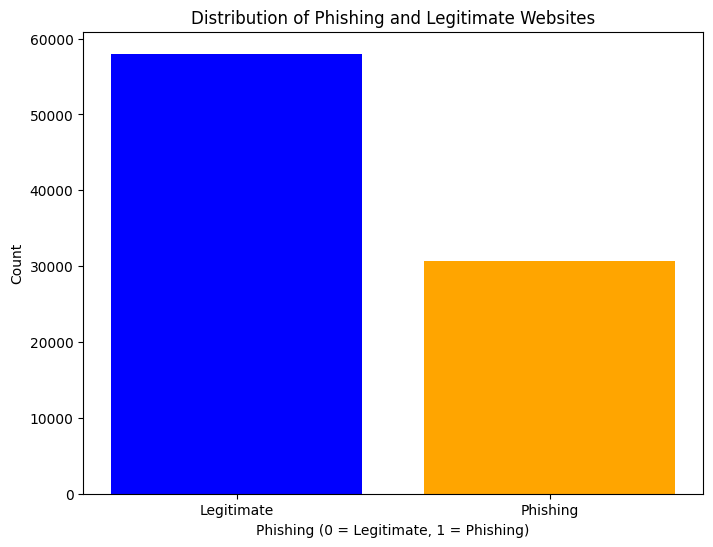

In [ ]:
# What is the class imbalance present in our dataset
phishing_counts = data['phishing'].value_counts()

plt.figure(figsize=(8,6))
plt.bar(phishing_counts.index, phishing_counts.values, color=['blue', 'orange'])
plt.xlabel('Phishing (0 = Legitimate, 1 = Phishing)')
plt.ylabel('Count')
plt.title('Distribution of Phishing and Legitimate Websites')
plt.xticks([0, 1], ['Legitimate', 'Phishing'])
plt.show()

There is a significant class imbalance which is present in the dataset, where the count of Legitimate websites is far more than Phishing links.
Thus, to sort the imbalance there can be two approaches:
1. Oversampling our data using techniques like SMOTE or the use of data augmentation
2. Collecting more data from credible resources

The trade off between generating synthetic data for a crucial task like detecting phishing links and the time required in acquiring original links must be considered before choosing a certain approach.


In [ ]:
# Identifying Unusual/missing values
missing_or_unusual_values = data.isin([-1]).sum()

columns = missing_or_unusual_values[missing_or_unusual_values > 0]

print(columns)

qty_dot_directory             47509
qty_hyphen_directory          47509
qty_underline_directory       47509
qty_slash_directory           47509
qty_questionmark_directory    47509
qty_equal_directory           47509
qty_at_directory              47509
qty_and_directory             47509
qty_exclamation_directory     47509
qty_space_directory           47509
qty_tilde_directory           47509
qty_comma_directory           47509
qty_plus_directory            47509
qty_asterisk_directory        47509
qty_hashtag_directory         47509
qty_dollar_directory          47509
qty_percent_directory         47509
directory_length              47509
qty_dot_file                  47509
qty_hyphen_file               47509
qty_underline_file            47509
qty_slash_file                47509
qty_questionmark_file         47509
qty_equal_file                47509
qty_at_file                   47509
qty_and_file                  47509
qty_exclamation_file          47509
qty_space_file              

It is observed that there is a High Volume of Missing or Unusual Values, many features have a high count of -1 values, which might indicate missing data, errors, or placeholder values.

Columns with -1 values need careful handling, either by replacing these values with a meaningful substitute (mean, median, mode) or considering dropping these columns if they provide little useful information.

Thus, these columns are flagged for further analysis.

C:\Users\Saahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


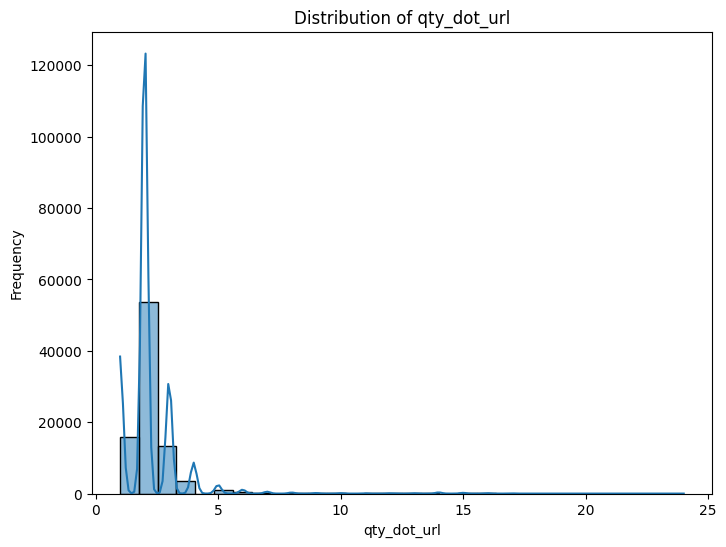

C:\Users\Saahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


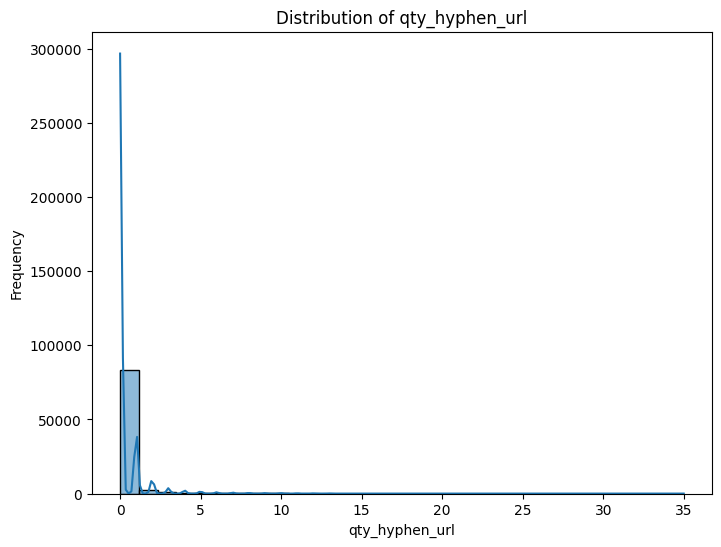

C:\Users\Saahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


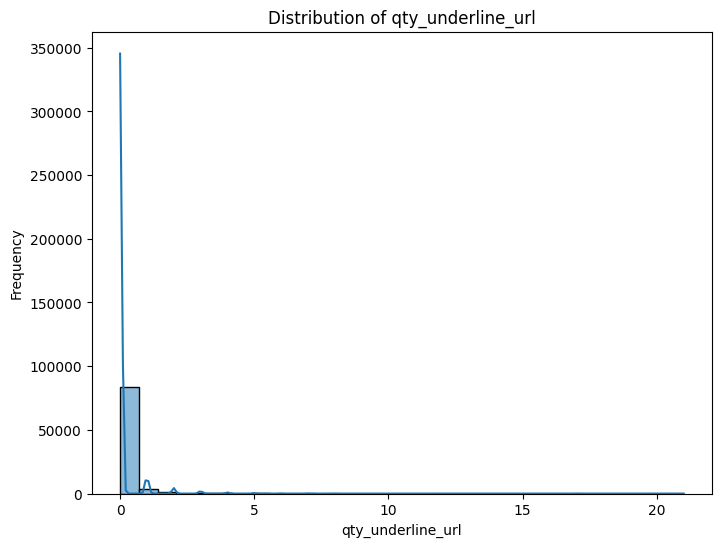

C:\Users\Saahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


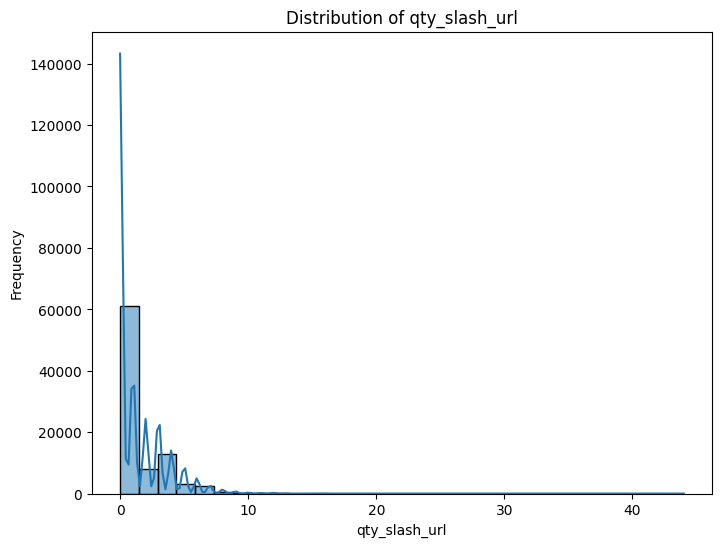

C:\Users\Saahil\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


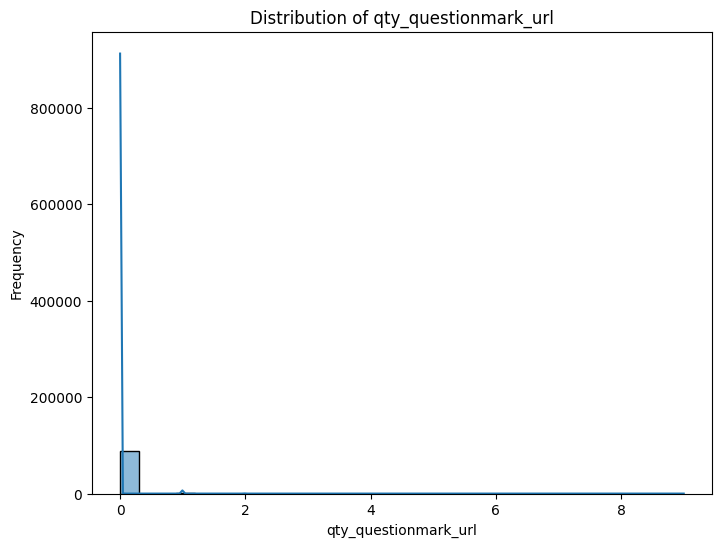

In [ ]:
url_features = ['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url', 'qty_questionmark_url']

# Plot histograms for URL-based features
for feature in url_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

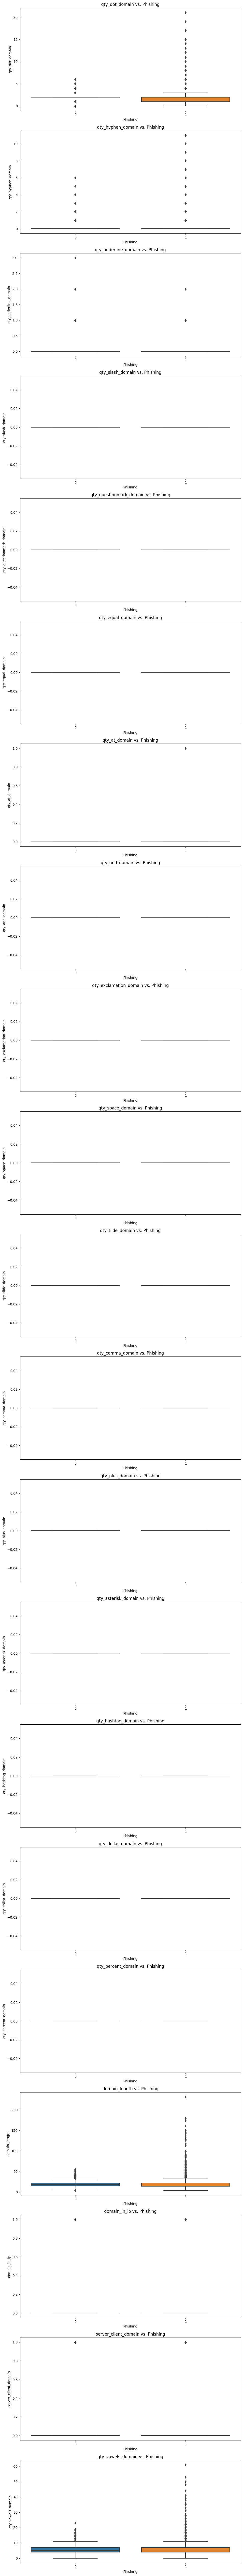

In [ ]:
domain_based_features = [
    'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
    'qty_slash_domain', 'qty_questionmark_domain', 'qty_equal_domain',
    'qty_at_domain', 'qty_and_domain', 'qty_exclamation_domain',
    'qty_space_domain', 'qty_tilde_domain', 'qty_comma_domain',
    'qty_plus_domain', 'qty_asterisk_domain', 'qty_hashtag_domain',
    'qty_dollar_domain', 'qty_percent_domain', 'domain_length',
    'domain_in_ip', 'server_client_domain', 'qty_vowels_domain'
]

fig, axes = plt.subplots(nrows=len(domain_based_features), ncols=1, figsize=(10, len(domain_based_features) * 5))

# Plot each feature
for i, feature in enumerate(domain_based_features):
    plt.subplot(len(domain_based_features), 1, i + 1)
    sns.boxplot(x='phishing', y=feature, data=data)
    plt.title(f'{feature} vs. Phishing')
    plt.xlabel('Phishing')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()

## Data Preprocessing


In [ ]:
# Detecting the number of outliers using the z-score method
outliers = []
def detect_outliers(data):
    data = sorted(data)
    count=0
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lower_bound = q1-(1.5*IQR)
    upper_bound = q3+(1.5*IQR)
    for i in data:
        if (i<lower_bound or i>upper_bound):
            outliers.append(i)
            count += 1
    return outliers,count

In [ ]:
outliers,count = detect_outliers(data['qty_hyphen_directory'])
# print("Outliers from IQR method: ", outliers)
print("\nThe number of outliers present are: ",count)


The number of outliers present are:  2526


The presence of outliers is observed in multiple features. Removing this features does not make sense and we might lose a large chunk of data.

Thus, proposed approaches are:
1. Using models robust to outliers such as random forest or ensemble techniques
2. Analyse how outliers affect by experimenting separately

In [ ]:
train_df, test_df = train_test_split(data, train_size = 0.8, random_state = 42, shuffle = True, stratify = data['phishing'])

We will split our data into training and testing data frames, respectively, since we will be performing oversampling ahead to remove class imbalance. Thus, oversampling only the train data frame is necessary to avoid data leakage.

The data is shuffled to improve the generalizability of the model and stratified in order to ensure that the class balance remains the same in both splits of our data.

In [ ]:
train_df.head()
print(train_df.shape)

(70917, 112)


In [ ]:
test_df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
18921,3,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,40,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,15,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.484173,1,20013,3230,56,1,2,1,407,1,0,0,0,0,1
74673,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,14,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.321121,0,34788,-1,-1,1,2,1,4179,1,2,0,0,0,0
19334,1,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,57,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,28,0,0,0,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,29,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.669312,0,16276,1688,137,1,2,1,9725,0,0,0,0,0,1
55653,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,21,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6,21,0,0,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,0.461181,0,7018,7241,427,1,2,1,298,0,-1,0,0,0,0
39341,2,0,1,3,0,3,0,2,0,0,0,0,0,0,0,0,0,1,238,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,28,0,0,1,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,45,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,0,1,0,0,3,0,2,0,0,0,0,0,0,0,0,0,165,0,3,0,0.839999,0,20013,967,493,1,2,2,519,1,0,0,0,0,1


In [ ]:
test_df.shape

(17730, 112)

In [ ]:
X = train_df.drop('phishing', axis=1)
y = train_df['phishing']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy='auto', random_state=42)
enn = EditedNearestNeighbours(sampling_strategy='all', n_jobs=-1)

smote_enn = SMOTEENN(sampling_strategy='auto', smote=smote, enn=enn, random_state=42, n_jobs=-1)

X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


In [ ]:
X_resampled.shape

(59463, 111)

In [ ]:
X_test = test_df.drop('phishing',axis=1)
y_test = test_df['phishing']

Original class distribution:
Counter({0: 37112, 1: 19621})


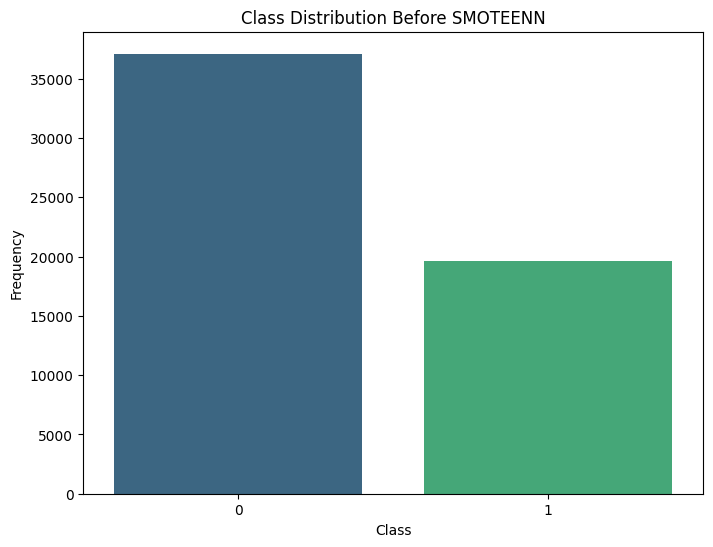

Resampled class distribution:
Counter({1: 30363, 0: 29100})


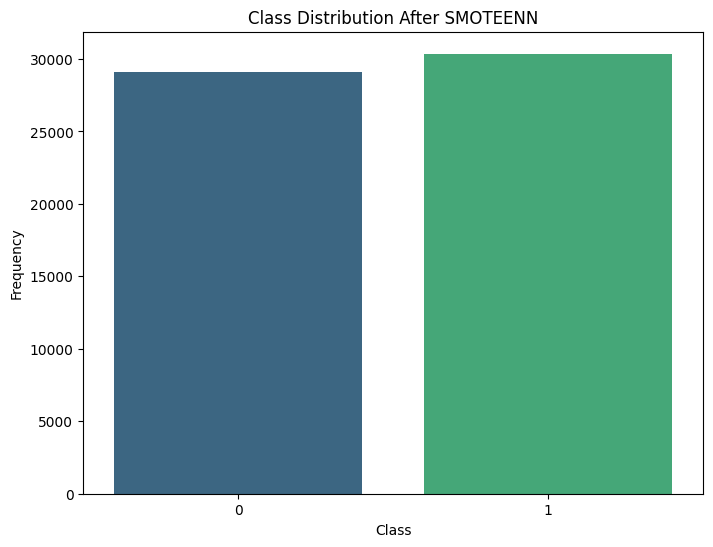

In [ ]:
from collections import Counter

# Function to plot the distribution of classes
def plot_class_distribution(y, title):
    plt.figure(figsize=(8, 6))
    sns.countplot(x=y, palette='viridis')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.show()

# Before applying SMOTEENN
print("Original class distribution:")
print(Counter(y_train))
plot_class_distribution(y_train, 'Class Distribution Before SMOTEENN')

# After applying SMOTEENN
print("Resampled class distribution:")
print(Counter(y_resampled))
plot_class_distribution(y_resampled, 'Class Distribution After SMOTEENN')


In [ ]:
#standardization
scaler = StandardScaler()
scaler.fit(X_resampled)
X_train_scaled = scaler.transform(X_resampled)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_df.drop('phishing', axis=1))

In [ ]:
X_train_scaled.shape

(59463, 111)

In [ ]:
y_resampled.shape

(59463,)

## Feature Selection

In [ ]:
#Recursive Feature Elimination
rf_model = RandomForestClassifier(random_state=42)

rfecv = RFECV(estimator=rf_model, step=1, cv=StratifiedKFold(5),
              scoring='accuracy', n_jobs=-1)

rfecv.fit(X_train_scaled, y_resampled)





RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
      scoring='accuracy')

In [ ]:
optimal_num_features = rfecv.n_features_

# Get the support and ranking of the features
support = rfecv.support_  # This is a boolean array
ranking = rfecv.ranking_  # This is an array of feature rankings

# Get the indices of the selected features
selected_features_indices = np.where(support)[0]

# If you want the selected features from the original DataFrame (before scaling)
selected_features = X_train.columns[selected_features_indices]

# Print the results
print(f"Optimal number of features: {optimal_num_features}")
print(f"Selected feature indices: {selected_features_indices}")
print(f"Selected features: {selected_features.tolist()}")
print(f"Feature ranking: {ranking}")

Optimal number of features: 38
Selected feature indices: [  0   3  18  19  36  37  40  41  42  43  44  46  47  48  51  55  57  58
  59  60  61  67  68  70  73  74  75  93  97  99 100 101 102 103 104 105
 106 107]
Selected features: ['qty_dot_url', 'qty_slash_url', 'length_url', 'qty_dot_domain', 'qty_vowels_domain', 'domain_length', 'qty_dot_directory', 'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory', 'qty_questionmark_directory', 'qty_at_directory', 'qty_and_directory', 'qty_exclamation_directory', 'qty_comma_directory', 'qty_dollar_directory', 'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file', 'qty_slash_file', 'qty_space_file', 'qty_tilde_file', 'qty_plus_file', 'qty_dollar_file', 'qty_percent_file', 'file_length', 'params_length', 'time_response', 'asn_ip', 'time_domain_activation', 'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate', 'qty_redirects']
Feature ranki

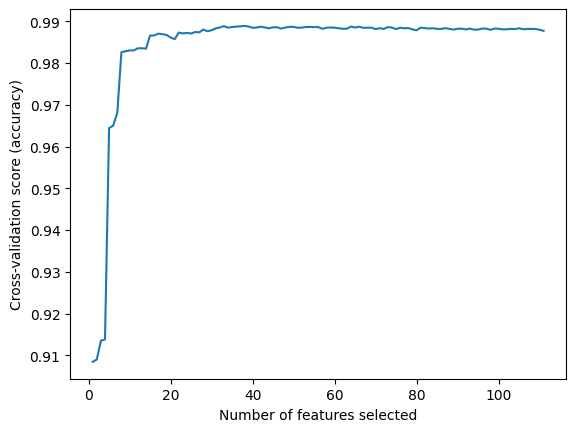

In [ ]:
# Access the mean test scores from cross-validation results
mean_test_scores = rfecv.cv_results_['mean_test_score']

# Plot the number of features selected vs. cross-validation score
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross-validation score (accuracy)")
plt.plot(range(1, len(mean_test_scores) + 1), mean_test_scores)
plt.show()

## Model Training

In [ ]:
selected_features = ['qty_dot_url', 'qty_slash_url', 'length_url', 'qty_dot_domain',
                     'qty_vowels_domain', 'domain_length', 'qty_dot_directory',
                     'qty_hyphen_directory', 'qty_underline_directory', 'qty_slash_directory',
                     'qty_questionmark_directory', 'qty_at_directory', 'qty_and_directory',
                     'qty_exclamation_directory', 'qty_comma_directory', 'qty_dollar_directory',
                     'directory_length', 'qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
                     'qty_slash_file', 'qty_space_file', 'qty_tilde_file', 'qty_plus_file',
                     'qty_dollar_file', 'qty_percent_file', 'file_length', 'params_length',
                     'time_response', 'asn_ip', 'time_domain_activation', 'time_domain_expiration',
                     'qty_ip_resolved', 'qty_nameservers', 'qty_mx_servers', 'ttl_hostname',
                     'tls_ssl_certificate', 'qty_redirects']


In [ ]:
original_columns = X_train.columns.tolist()


In [ ]:
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=original_columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=original_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=original_columns)

In [ ]:
X_train_scaled_df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,qty_tilde_url,qty_comma_url,qty_plus_url,qty_asterisk_url,qty_hashtag_url,qty_dollar_url,qty_percent_url,qty_tld_url,length_url,qty_dot_domain,qty_hyphen_domain,qty_underline_domain,qty_slash_domain,qty_questionmark_domain,qty_equal_domain,qty_at_domain,qty_and_domain,qty_exclamation_domain,qty_space_domain,qty_tilde_domain,qty_comma_domain,qty_plus_domain,qty_asterisk_domain,qty_hashtag_domain,qty_dollar_domain,qty_percent_domain,qty_vowels_domain,domain_length,domain_in_ip,server_client_domain,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_equal_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_space_directory,qty_tilde_directory,qty_comma_directory,qty_plus_directory,qty_asterisk_directory,qty_hashtag_directory,qty_dollar_directory,qty_percent_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_questionmark_file,qty_equal_file,qty_at_file,qty_and_file,qty_exclamation_file,qty_space_file,qty_tilde_file,qty_comma_file,qty_plus_file,qty_asterisk_file,qty_hashtag_file,qty_dollar_file,qty_percent_file,file_length,qty_dot_params,qty_hyphen_params,qty_underline_params,qty_slash_params,qty_questionmark_params,qty_equal_params,qty_at_params,qty_and_params,qty_exclamation_params,qty_space_params,qty_tilde_params,qty_comma_params,qty_plus_params,qty_asterisk_params,qty_hashtag_params,qty_dollar_params,qty_percent_params,params_length,tld_present_params,qty_params,email_in_url,time_response,domain_spf,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened
0,-0.873748,-0.311615,-0.194724,-0.343877,-0.101099,-0.260074,-0.089059,-0.189284,-0.034871,-0.018209,-0.042401,-0.034335,-0.025656,-0.020888,-0.010261,-0.022021,-0.076465,-0.194254,-0.488382,-1.062609,-0.267506,-0.021925,0.0,0.0,0.0,-0.004101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.570590,-0.376053,-0.042854,-0.065497,0.175708,0.226232,0.498833,-0.103164,0.833911,0.779281,0.731406,0.720586,0.817125,0.811024,0.812648,0.832868,0.816831,0.736032,0.833911,0.809787,0.275755,-0.534144,0.286375,0.464980,0.625534,0.833911,0.833911,0.823114,0.832781,0.824411,0.828033,0.822790,0.832666,0.833563,0.818574,0.832608,0.833911,0.833911,0.323466,-0.241573,-0.256189,-0.26262,-0.297134,-0.290172,-0.404768,-0.317215,-0.397039,-0.278434,-0.416481,-0.420155,-0.42021,-0.414429,-0.412563,-0.419686,-0.42021,-0.418352,-0.189168,-0.218154,-0.395274,-0.334737,-0.152935,-0.227704,0.001110,-0.622333,-0.011886,-0.100434,1.004571,0.213097,-1.002206,-0.511524,1.031038,-0.403027,-0.018597,16.887600,-0.089354
1,-0.159669,-0.311615,-0.194724,-0.839550,-0.101099,-0.260074,-0.089059,-0.189284,-0.034871,-0.018209,-0.042401,-0.034335,-0.025656,-0.020888,-0.010261,-0.022021,-0.076465,-0.194254,-0.488382,0.307008,-0.267506,-0.021925,0.0,0.0,0.0,-0.004101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.197495,-0.234729,-0.042854,-0.065497,-0.930381,-0.750209,-0.944088,-0.969671,-1.199169,-1.167137,-1.068296,-1.066841,-1.184552,-1.174480,-1.184645,-1.198670,-1.179603,-1.077454,-1.199169,-1.172852,-0.491079,-0.607198,-1.029601,-0.845466,-1.005303,-1.199169,-1.199169,-1.192487,-1.198629,-1.194365,-1.196362,-1.187299,-1.198462,-1.199003,-1.181214,-1.198379,-1.199169,-1.199169,-0.529684,-0.302710,-0.256189,-0.26262,-0.297134,-0.290172,-0.404768,-0.317215,-0.397039,-0.278434,-0.416481,-0.420155,-0.42021,-0.414429,-0.412563,-0.419686,-0.42021,-0.418352,-0.189168,-0.218154,-0.395274,-0.334737,-0.152935,-0.140556,0.001110,-0.272861,0.733365,-0.215701,-0.152340,-0.568942,3.148550,-0.375317,1.031038,0.937984,-0.018597,-0.026169,-0.089354
2,0.554410,-0.311615,-0.194724,-0.343877,-0.101099,-0.260074,-0.089059,-0.189284,-

In [ ]:
X_train_selected = X_train_scaled_df[selected_features]
X_val_selected = X_val_scaled_df[selected_features]
X_test_selected = X_test_scaled_df[selected_features]

In [ ]:
X_train_selected.head()

,qty_dot_url,qty_slash_url,length_url,qty_dot_domain,qty_vowels_domain,domain_length,qty_dot_directory,qty_hyphen_directory,qty_underline_directory,qty_slash_directory,qty_questionmark_directory,qty_at_directory,qty_and_directory,qty_exclamation_directory,qty_comma_directory,qty_dollar_directory,directory_length,qty_dot_file,qty_hyphen_file,qty_underline_file,qty_slash_file,qty_space_file,qty_tilde_file,qty_plus_file,qty_dollar_file,qty_percent_file,file_length,params_length,time_response,asn_ip,time_domain_activation,time_domain_expiration,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects
0,-0.873748,-0.343877,-0.488382,-1.062609,0.570590,-0.376053,0.175708,0.226232,0.498833,-0.103164,0.833911,0.731406,0.720586,0.817125,0.832868,0.809787,-0.534144,0.286375,0.464980,0.625534,0.833911,0.822790,0.832666,0.818574,0.833911,0.323466,-0.241573,-0.218154,-0.227704,-0.622333,-0.011886,-0.100434,1.004571,0.213097,-1.002206,-0.511524,1.031038,-0.403027
1,-0.159669,-0.839550,-0.488382,0.307008,-0.197495,-0.234729,-0.930381,-0.750209,-0.944088,-0.969671,-1.199169,-1.068296,-1.066841,-1.184552,-1.198670,-1.172852,-0.607198,-1.029601,-0.845466,-1.005303,-1.199169,-1.187299,-1.198462,-1.181214,-1.199169,-0.529684,-0.302710,-0.218154,-0.140556,-0.272861,0.733365,-0.215701,-0.152340,-0.568942,3.148550,-0.375317,1.031038,0.937984
2,0.554410,-0.343877,-0.122838,1.676625,2.490804,2.591744,0.175708,0.226232,0.498833,-0.103164,0.833911,0.731406,0.720586,0.817125,0.832868,0.809787,-0.534144,0.286375,0.464980,0.625534,0.833911,0.822790,0.832666,0.818574,0.833911,0.323466,-0.241573,-0.218154,-0.220147,-0.359774,0.659434,-0.458279,-0.152340,0.995135,-1.002206,-0.511795,1.031038,0.937984
3,-0.873748,-0.343877,-0.575416,-1.062609,-0.581538,-1.082671,0.175708,0.226232,0.498833,-0.103164,0.833911,0.731406,0.720586,0.817125,0.832868,0.809787,-0.534144,0.286375,0.464980,0.625534,0.833911,0.822790,0.832666,0.818574,0.833911,0.323466,-0.241573,-0.218154,-0.105419,-0.398192,0.833040,-0.105595,1.004571,-0.568942,-0.409241,-0.511253,1.031038,0.937984
4,-0.159669,-0.839550,-0.279500,0.307008,1.338676,1.461155,-0.930381,-0.750209,-0.944088,-0.969671,-1.199169,-1.068296,-1.066841,-1.184552,-1.198670,-1.172852,-0.607198,-1.029601,-0.845466,-1.005303,-1.199169,-1.187299,-1.198462,-1.181214,-1.199169,-0.529684,-0.302710,-0.218154,-0.331924,-0.398192,-1.007645,-0.566664,4.475305,-0.568942,-1.002206,-0.511524,1.031038,0.937984


In [ ]:
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(solver = 'newton-cholesky',random_state=42, n_jobs=-1),
    'Random Forest': RandomForestClassifier(
    n_estimators=200,
    criterion="entropy",
    max_depth=20,
    min_samples_split=10,
    min_samples_leaf=5,
    max_features="sqrt",
    bootstrap=True,
    oob_score=True,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1,
    min_impurity_decrease=0.01,
    ccp_alpha=0.0
),
    'Support Vector Machine': SVC(C=1.0,
    kernel='rbf',
    gamma='scale',
    degree=3,
    coef0=0.0,
    class_weight=None,
    probability=True,
    random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

In [ ]:
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_selected, y_resampled)
    y_pred_val = model.predict(X_val_selected)
    print(f"Validation Results for {name}:")
    print(classification_report(y_val, y_pred_val))
    print('-' * 80)


Training Logistic Regression...
Validation Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      9288
           1       0.85      0.93      0.89      4896

    accuracy                           0.92     14184
   macro avg       0.91      0.92      0.91     14184
weighted avg       0.92      0.92      0.92     14184

--------------------------------------------------------------------------------
Training Random Forest...
Validation Results for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      9288
           1       0.74      0.97      0.84      4896

    accuracy                           0.88     14184
   macro avg       0.86      0.90      0.87     14184
weighted avg       0.90      0.88      0.88     14184

--------------------------------------------------------------------------------
Training Support Vector Machine...
Validatio

In [ ]:
kf = KFold(n_splits=10, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"Performing K-Fold Cross-Validation for {name}...")
    cv_scores = cross_val_score(model, X_train_selected, y_resampled, cv=kf, scoring='accuracy')
    print(f"Cross-Validation Accuracy for {name}: {np.mean(cv_scores):.4f} ± {np.std(cv_scores):.4f}")
    print('-' * 80)


Performing K-Fold Cross-Validation for Logistic Regression...
Cross-Validation Accuracy for Logistic Regression: 0.9504 ± 0.0025
--------------------------------------------------------------------------------
Performing K-Fold Cross-Validation for Random Forest...
Cross-Validation Accuracy for Random Forest: 0.9151 ± 0.0040
--------------------------------------------------------------------------------
Performing K-Fold Cross-Validation for Support Vector Machine...
Cross-Validation Accuracy for Support Vector Machine: 0.9737 ± 0.0022
--------------------------------------------------------------------------------
Performing K-Fold Cross-Validation for XGBoost...
Cross-Validation Accuracy for XGBoost: 0.9907 ± 0.0008
--------------------------------------------------------------------------------


In [ ]:
for name, model in models.items():
    print(f"Final Testing on {name}...")
    y_pred_test = model.predict(X_test_selected)
    print(f"Test Results for {name}:")
    print(classification_report(y_test, y_pred_test))
    print('-' * 80)


Final Testing on Logistic Regression...
Test Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     11600
           1       0.84      0.93      0.88      6130

    accuracy                           0.92     17730
   macro avg       0.90      0.92      0.91     17730
weighted avg       0.92      0.92      0.92     17730

--------------------------------------------------------------------------------
Final Testing on Random Forest...
Test Results for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     11600
           1       0.74      0.98      0.84      6130

    accuracy                           0.87     17730
   macro avg       0.86      0.90      0.87     17730
weighted avg       0.90      0.87      0.88     17730

--------------------------------------------------------------------------------
Final Testing on Support Vector Machine.

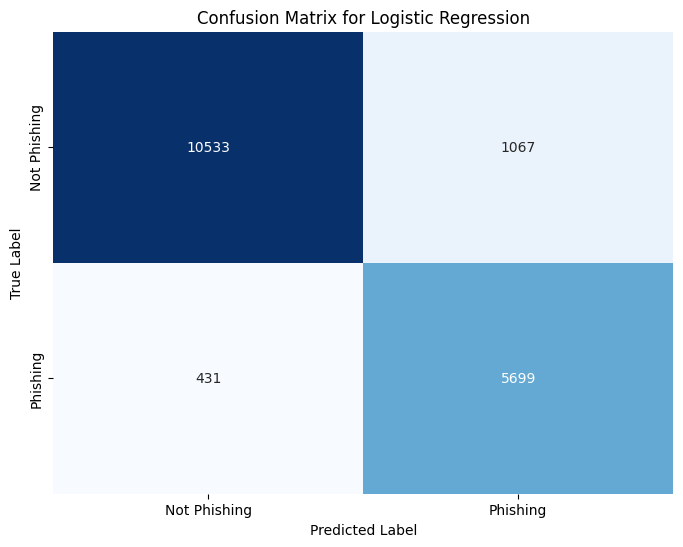

Test Results for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.91      0.93     11600
           1       0.84      0.93      0.88      6130

    accuracy                           0.92     17730
   macro avg       0.90      0.92      0.91     17730
weighted avg       0.92      0.92      0.92     17730

--------------------------------------------------------------------------------


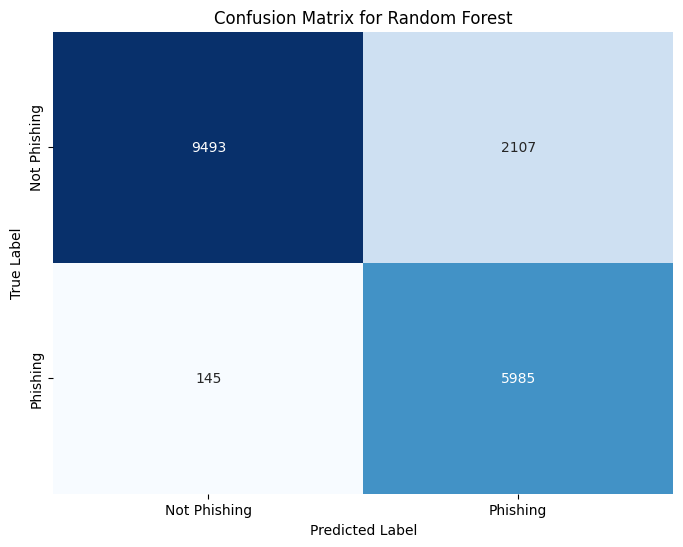

Test Results for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.82      0.89     11600
           1       0.74      0.98      0.84      6130

    accuracy                           0.87     17730
   macro avg       0.86      0.90      0.87     17730
weighted avg       0.90      0.87      0.88     17730

--------------------------------------------------------------------------------


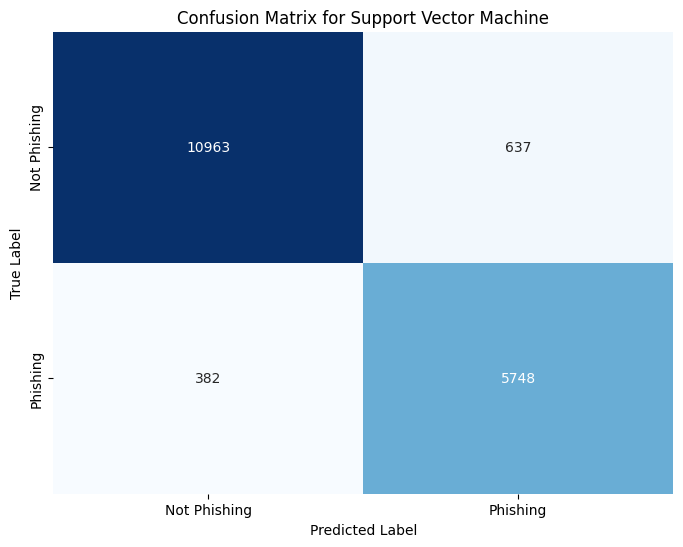

Test Results for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96     11600
           1       0.90      0.94      0.92      6130

    accuracy                           0.94     17730
   macro avg       0.93      0.94      0.94     17730
weighted avg       0.94      0.94      0.94     17730

--------------------------------------------------------------------------------


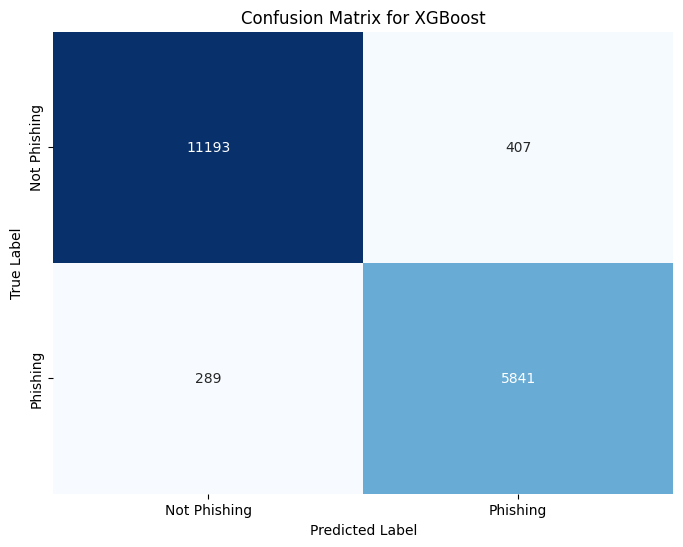

Test Results for XGBoost:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97     11600
           1       0.93      0.95      0.94      6130

    accuracy                           0.96     17730
   macro avg       0.95      0.96      0.96     17730
weighted avg       0.96      0.96      0.96     17730

--------------------------------------------------------------------------------


In [ ]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
    plt.yticks(ticks=np.arange(len(classes)) + 0.5, labels=classes)
    plt.show()

classes = ['Not Phishing', 'Phishing']

for name, model in models.items():
    y_pred_test = model.predict(X_test_selected)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)

    # Plot confusion matrix
    plot_confusion_matrix(cm, classes, name)

    print(f"Test Results for {name}:")
    print(classification_report(y_test, y_pred_test))
    print('-' * 80)